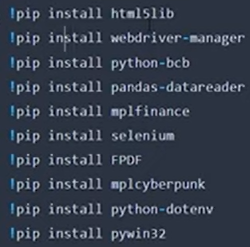

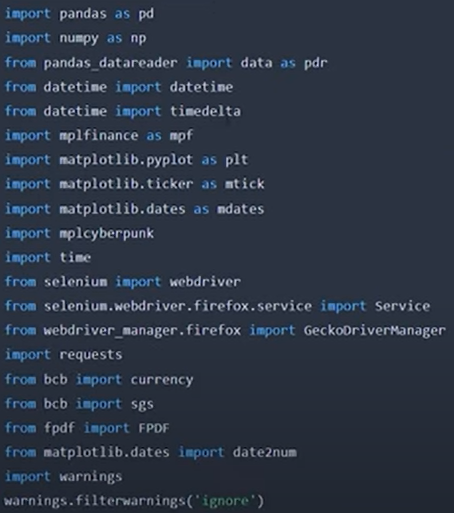

In [9]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from datetime import datetime
from datetime import timedelta
#import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick #serve para configurar o eixo y em real, dolar, etc.
import matplotlib.dates as mdates #serve para configurar o eixo x com relação as datas
#import mplcyberpunk #É o tema, o fundo, cores das linhas, estilização
import time
#from selenium import webdriver
#from selenium.webdriver.firefox.service import service
#from webdriver_manager.firefox import GeckDriverManager
import requests
#from bcb import currency #pacote de api (site) do banco central para pegar os dados automaticamente - neste caso 
#from bcb import sgs
#from fpdf import FPDF
from matplotlib.dates import date2num
import warnings
#!pip install pywin32
import win32com.client as win32
warnings.filterwarnings('ignore')

#Selecionando os Ativos

In [14]:
indices = ['^BVSP','^GSPC', 'WEGE3.SA', 'AMBEV3.SA'] #códigos dos ativos

In [11]:
hoje = datetime.now()

In [16]:
print(hoje)

2022-10-20 13:46:52.639892


In [12]:
um_ano_atras = hoje - timedelta(days=366)

In [ ]:
dados_mercado = pdr.get_data_yahoo(indices, start = um_ano_atras, end = hoje)

In [ ]:
dados_mercado

#Pegando fechamento de cada ativo

In [ ]:
dados_fechamento = dados_mercado['Adj close'] #seleciona a coluna de fechamento

In [ ]:
dados_fechamento.columns = ['Ibov', 'S&P500']

In [ ]:
dados_fechamento = dados_fechamento.dropna() #retirando nan da tabela de informações do Ibovespa

In [ ]:
print(dados_fechamento)

#Pegando fechamento mensal e anual para calcular rentabilidade

In [ ]:
dados_anuais = dados_fechamento.resample('Y').last() #pegando o fechamento anual

In [ ]:
dados_mensais = dados_fechamento.resample('M').last() #pegando o fechamento mensal

#Calculando rentabilidade

In [ ]:
retorno_diario = dados_fechamento.pct_change().dropna() #percent change = calcula rentabilidade dia contra dia

In [ ]:
retorno_mes_a_mes = dados_mensais.pct_change().dropna()

In [ ]:
retorno_mes_a_mes = retorno_mes_a_mes.iloc[1: , :] #selecionando a partir da linha 2 em diante, e depois selecionando todas as colunas

In [ ]:
display(retorno_mes_a_mes)

In [ ]:
retorno_do_ano = dados_anuais.pct_change().dropna()

In [ ]:
display(retorno_do_ano)

#fechamento do dia

In [ ]:
fechamento_do_dia = retorno_diario.iloc[-1, :] #selecionando somente a última linha da tabela (última data)

In [ ]:
display(fechamento_do_dia)

#Volatilidade

In [ ]:
volatilidade_12m_ibov = retorno_diario['Ibov'].std()*np.sqrt(252) #std = desvio padrão do retorno diário multiplicado pela raiz quadrada de 252 

In [ ]:
volatilidade_12m_sp = retorno_diario['S&P500'].std()*np.sqrt(252)

In [ ]:
print(volatilidade_12m_ibov)

In [ ]:
print(volatilidade_12m_sp)

#Plotando

  Ibov

In [ ]:
fig, ax = plt.subplots() #criando os eixos do gráfico

In [ ]:
plt.style.use('cyberpunk') #opcional

In [ ]:
ax.plot(dados_fechamento.index, dados_fechamento['Ibov']) #index (x) são as datas e os dados_fechamento (y)

In [ ]:
#dados_fechamento.index puxa o indice
#dados_fechamento.columns puxa as colunas
#dados_fechamento['Ibov'] puxa os dados de fechamento do ibov

In [ ]:
ax.grid(False)

In [ ]:
plt.savefig('ibov.png', dpi = 300) #salvando a imagem no pc

In [ ]:
plt.show()

S&P500

In [ ]:
fig, ax = plt.subplots()

In [ ]:
plt.style.use('cyberpunk')

In [ ]:
ax.plot(dados_fechamento.index, dados_fechamento['S&P500'])

In [ ]:
ax.grid(False)

In [ ]:
plt.savefig('S&P.png', dpi = 300)

In [ ]:
plt.show()

#Pegando dados DI (curva de juros) utilizando um webscraping

In [ ]:
https://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/SistemaPregao1.asp?pagetype=pop&caminho=Resumo%20Estat%EDstico%20-%20Sistema%20Preg%E3o&Data=07/10/2022&Mercadoria=DI1

In [ ]:
data_inicial = dados_fechamento.index[0]

In [ ]:
if datetime.now().hour<10:
  data_final = dados_fechamento.index[-1]
else:
  data_final = dados_fechamento.index[-2]

In [ ]:
print(data_inicial)

In [ ]:
data_inicial = data_inicial.strftime("%d%m%y") #formatando a data

In [ ]:
data_final = data_final.strftime("%d%m%y")

In [ ]:
print(data_final)

In [ ]:
#Criando as URLs
url_mais_att = f'''https://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/SistemaPregao1.asp?pagetype=pop&caminho=Resumo%20Estat%EDstico%20-%20Sistema%20Preg%E3o&Data={data_inicial}&Mercadoria=DI1'''

In [ ]:
url_mais_antiga = f'''https://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/SistemaPregao1.asp?pagetype=pop&caminho=Resumo%20Estat%EDstico%20-%20Sistema%20Preg%E3o&Data={data_final}&Mercadoria=DI1'''

webscraping

In [ ]:
def pegando_dados_di(url):
  driver = webdriver.Firefox(service=service(GeckoDriverManager().install()))

  sem_conexao = True

  while sem_conexao:
    try:
      driver.get(url)
      sem_conexao = False
    except:
      pass

In [ ]:
local_tabela = '''//div[@id = "containerPop"]//div@id[@id = "pageContent"]//form//table//tbody//tr[3]//td[3]//table'''

In [ ]:
local_tabela = '''//div[@id = "containerPop"]//div@id[@id = "pageContent"]//form//table//tbody//tr[3]//td[1]//table'''

In [ ]:
elemento = driver.find_element("xpath", local_tabela)

In [ ]:
elemento_indice = driver.find_element("xpath", local_indice)

In [ ]:
html_tabela = elemento.get_attribute('outerHTML')

In [ ]:
html_indice = elemento_indice.get_attribute('outerHTML')

In [ ]:
driver.quit()

In [ ]:
tabela = pd.read_html(html_tabela)[0]

In [ ]:
indice = pd.read_html(html_indice)[0]

In [ ]:
return tabela, indice

#Tratando dados DI

In [ ]:
def tratando_dados_DI(df_dados,indice):
  df_dados.columns = df_dados.loc[0]
  df_dados = df_dados['ÚLT. PREÇO']
  df_dados = df_dados.drop(0,axis = 0)
  indice.columns = indice.loc[0]
  indice_di = indice['VENCTO']
  indice = indice.drop(0,axis = 0)
  df_dados.index = indice['VENCTO']
  print(df_dados)
  df_dados = df_dados.astype(int)
  df_dados = df_dados[df_dados !=0]
  df_dados  = df_dados/1000
  print(df_dados)
  return df_dados

In [ ]:
legenda = pd.series(['Jan', 'Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
                    index = ['F','G','H','J','K','M','N','Q','U','V','X','Z'])
legenda
legenda['F']

In [ ]:
dados_di_recente_tratado = tratando_dados_di(di_mais_recente, indice_di_mais_recente)
dados_di_antigo_tratado = tratando_dados_di(di_mais_antigo, indice_di_mais_antigo)

#Transformando Datas

In [ ]:
def transformando_codigo_em_data(df):
  lista_datas[]

  for indice in df.index:

    letra = indice[0]
    ano = indice[1:3]

    mes = legenda[letra]
    data = f"{mes}{ano}"

    data = datetime.strptime(data, %b-%y)

    lista_datas.append(data)

  df.index = lista_datas

  return df

In [ ]:
dados_di_recente_tratado = transformando_codigo_em_data(dados_di_recente_tratado)
dados_di_antigo_tratado = transformando_codigo_em_data(dados_di_antigo_tratado)

dados_di_recente_tratado

#Criando a Curva de Juros

In [ ]:
fig, ax = plt.subplots()

In [ ]:
plt.style.use("cyberpunk")

In [ ]:
ax.set_ylim(3.5, 15)

In [ ]:
ax.plot(dados_di_recente_tratado.index, dados_di_recente_tratado.values, label = f'Curva {data_final}', marker = 'o')
ax.plot(dados_di_antigo_tratado.index, dados_di_antigo_tratado.values, label = f'Curva {data_inicial}', marker = 'o')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [ ]:
plt.legend()

In [ ]:
ax.grid(False)

In [ ]:
plt.savefig('juros.png', dpi = 300)

In [ ]:
plt.show()

#Pegando selic

In [ ]:
https://www.bcb.gov.br/sgspub/localizarSeries.do?method=prepararTelaLocalizarSeries
https://api.bcb.gov.br/dados/serie/bcdata.sgs.432/dados?formato=json

In [ ]:
selic = sgs.get({'selic':432}, start = '2010-01-01')

In [ ]:
print(selic)

#grafico da selic

In [ ]:
fig, ax = plt.subplots()
plt.style.use("cyberpunk")

ax.plot(selic.index, selic['selic'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(False)
plt.savefig('selic.png', dpi = 300)

plt.show()

#série do IPCA e IGP-M

In [ ]:
inflacao = sgs.get({'ipca': 433, 'ipg-m': 189}, start = um_ano_atras + timedelta(180))

In [ ]:
inflacao

#Gráfico selic

In [ ]:
fig, ax = plt.subplots()

In [ ]:
ax.bar(datas_numericas-7, inflacao['ipca'], label = 'IPCA', width = 7)
ax.bar(datas_numericas-7, inflacao['igp-m'], label = 'IGP-M', width = 7)

In [ ]:
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaixs_date()
formato_data = mdates.DateFormatter('%b-%y')
ax.xaxis.set_major_formatter(formato_data)
ax.grid(False)
plt.axhline(y=0, color = 'w')
plt.legend()
plt.savefig('inflacao.png', dpi = 300)

plt.show()

#Volatilidade do dolar

In [ ]:
volatilidade_12m_dolar = dolar_diario['USD'].std() * np.sqrt(252)
volatilidade_12m_dolar

In [ ]:
fig, ax = plt.ubplots()

plt.style.use("cyberpunk")

ax.plot(dolar.index, dolar['USD'])
ax.yaxis.set_major_formatter('R${x:1.2f}')
ax.grid(False)
plt.sevefig('dolar.png', dpi = 300)

plt.show

#criando PDF

In [ ]:
#fechamento_de_dia
#volatilidade_12m_ibov
#volatilidade_12m_sp
#retorno_mes_a_mes
#retorno_no_ano
#fechamento_de_dia_dolar
#retorno_mes_a_mes_dolar
#retorno_no_ano_dolar

In [ ]:
meses = []
for indice in retorno_mes_a_mes.index:
  mes = indice.strftime("%b")
  meses.append(mes)
meses

In [ ]:
#self - referencia ao próprio objeto
class PDF(FPDF):
  def header(self):

    self.image('logo.png', 10, 8,40) #imagem da logo
    self.set_font('Arial', 'B', 20) # B - bold - negrito
    self.ln(15) # espaço entre as linhas em mm
    self.set_draw_color(35, 155, 132) #cor RGB
    self.cell(15, ln = False) 
    self.cell(150, 15, f"Relatório de mercado {data_final}", border = True, ln= True, align = 'C')
    self.ln(5)

  def footer(self):
    self.set_y(-15)
    self.set_font('Arial', 'I', 10)
    self.cell(0,10, f"{self.page_no()}/{{nb}}", align = 'C')

#Definindo configurações básicas do PDF

In [ ]:
pdf = PDF('P', 'mm', 'Letter')
pdf.set_auto_page_break(auto = True, margin = 15)
pdf.alias_nb_pages()
pdf.add_page()
pdf.set_fill_color(255, 255,255)
pdf.set_draw_color(35,155,132)

In [ ]:
pdf.image('nave1.png', x = 155, y = 70, w = 75, h = 33, type = '', link = '')

pdf.set_font('Arial','B',18)
pdf.cell(0,10,'1 - Ações e câmbio', ln = True, border = False, fill = False)
pdf.ln(2)

pdf.set_font('Arial', '',14)
pdf.cell(0,15,"1.1 Fechamento do mercado", ln = True, border = False, fill = False)

pdf.ln(7)

pdf.output('aula2.pdf')

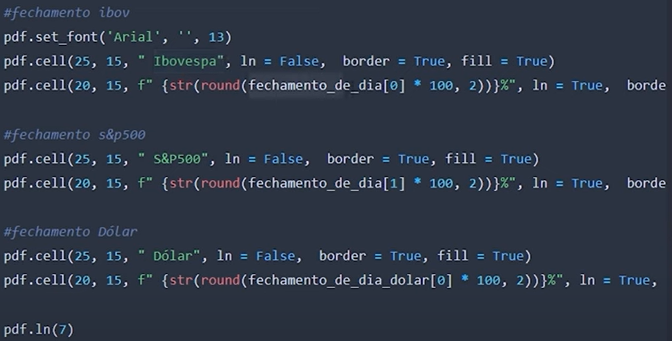

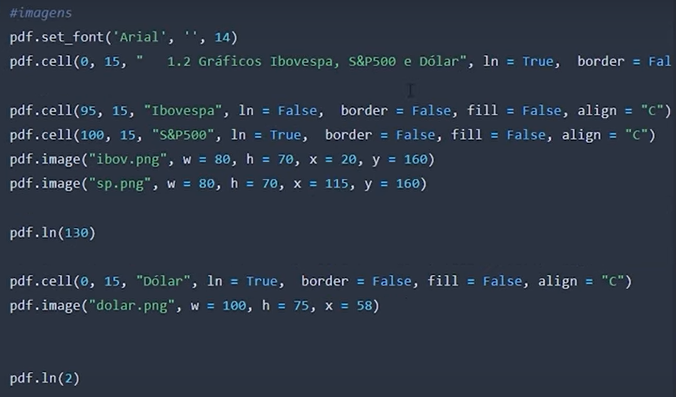

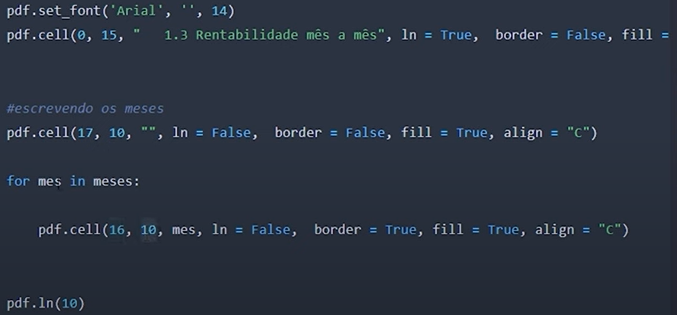

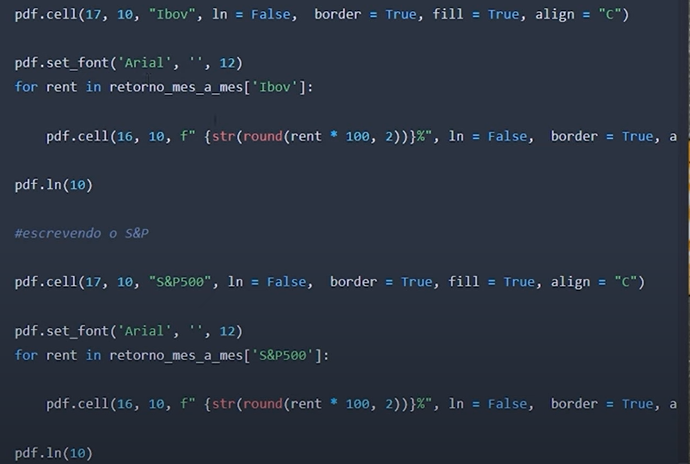

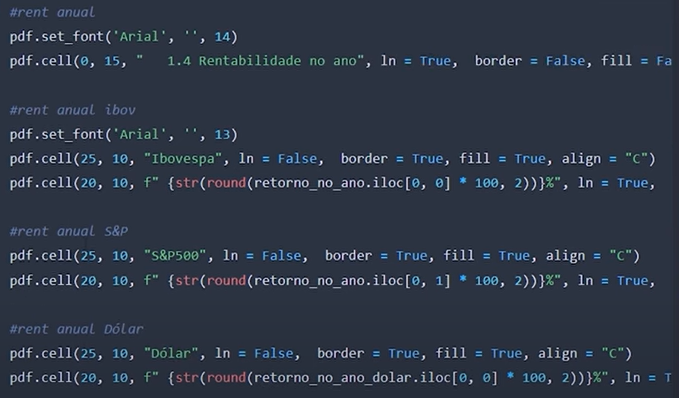

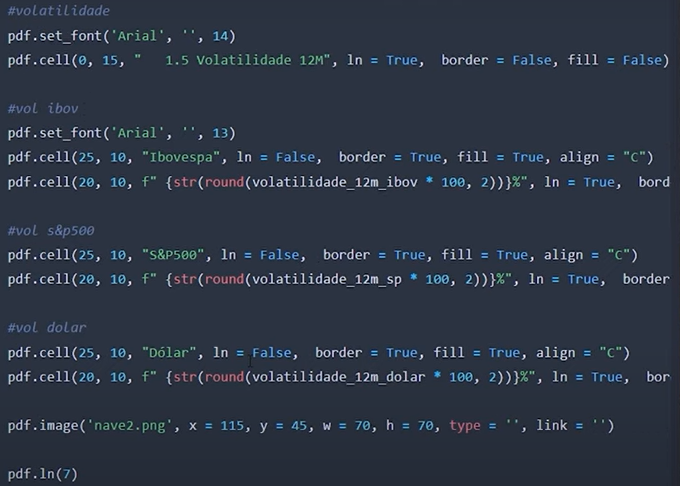

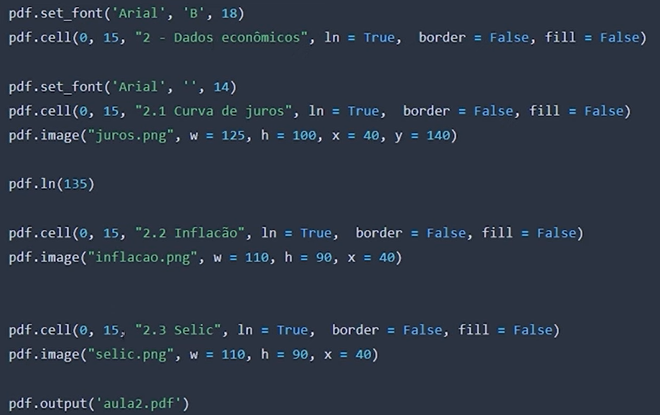

#Enviando para o outlook

In [ ]:
outlook = win32.Dispatch('outlook.application')

In [ ]:
#criando e-mail
email = outlook.CreateItem(0)

In [ ]:
email.to = "arthur-rizzo@hotmail.com"
email.subject = 'Relatório'
email.body = '''Segue em anexo o relatório diário.

Até.


'''

anexo = =r'COLOCAR O CAMINHO DO DOCUMENTO'
email.Attachments.Add(anexo)

email.send()